<a href="https://colab.research.google.com/github/Alla-ud-din/Classes-Q3-Q4/blob/master/LangGraph/Text_Analysis_Pipeline_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to LangGraph

LangGraph is a framework for creating applications using graph-based workflows. Each node represents a function or computational step, and edges define the flow between these nodes based on certain conditions.

## Key Features:
- State Management
- Flexible Routing
- Persistence
- Visualization

## Tutorial Overview: Text Analysis Pipeline

In this tutorial, we'll demonstrate the power of LangGraph by building a multi-step text analysis pipeline. Our use case will focus on processing a given text through three key stages:

1. **Text Classification**: We'll categorize the input text into predefined categories (e.g., News, Blog, Research, or Other).
2. **Entity Extraction**: We'll identify and extract key entities such as persons, organizations, and locations from the text.
3. **Text Summarization**: Finally, we'll generate a concise summary of the input text.

This pipeline showcases how LangGraph can be used to create a modular, extensible workflow for natural language processing tasks. By the end of this tutorial, you'll understand how to construct a graph-based application that can be easily modified or expanded for various text analysis needs.

## Building the Text Processing Pipeline

In [13]:
%%capture --no-stderr
%pip install --quiet -U langgraph

### Define State
Here we define the State class to hold our workflow data

In [14]:
from typing import TypedDict, List
class TextAnalysis(TypedDict):
  text: str
  classification: str
  entities: List[str]
  summary: str

In [15]:
# Testing state
lahore_state: TextAnalysis = TextAnalysis(text= "hello from UMT Lahore")
print(lahore_state)
print(lahore_state['text'])

{'text': 'hello from UMT Lahore'}
hello from UMT Lahore


In [16]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai

In [17]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

### Initialize Gemini LLM


In [18]:
from langchain_google_genai import ChatGoogleGenerativeAI
# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)

### Define Node Functions
These functions define the operations performed at each node of our graph: classification, entity extraction, and summarization.

In [19]:
def classification_node(state : TextAnalysis):
  prompt = state['text']
  classification = llm.invoke(prompt + "Classify the following text into one of the categories: News, Blog, Research, or Other.\n\nText:{text}\n\nCategory:")
  return {'classification': classification}
def entity_node(state : TextAnalysis):
  prompt = state['text']
  entities = llm.invoke(prompt + "Extract all the entities (Person, Organization, Location) from the following text. Provide the result as a comma-separated list.\n\nText:{text}\n\nEntities:")
  return {'entities': entities}
def summarization_node(state: TextAnalysis):
  prompt = state['text']
  summary = llm.invoke(prompt + "Summarize the following text in one short sentence.\n\nText:{text}\n\nSummary:")
  return {'summary': summary}






### Create Tools and Build Workflow
This cell builds the StateGraph workflow.

In [20]:
from langgraph.graph import StateGraph, START, END
workflow = StateGraph(TextAnalysis)

# Add nodes to the graph
workflow.add_node("classification_node", classification_node)
workflow.add_node("entity_extraction", entity_node)
workflow.add_node("summarization", summarization_node)

# Add edges to the graph
workflow.set_entry_point("classification_node") # Set the entry point of the graph
workflow.add_edge("classification_node", "entity_extraction")
workflow.add_edge("entity_extraction", "summarization")
workflow.add_edge("summarization", END)

# Compile the graph
app = workflow.compile()

## Visualizing the Workflow
This cell creates a visual representation of our workflow using Mermaid

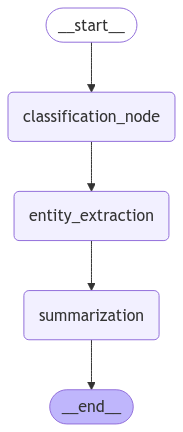

In [21]:
from IPython.display import Image, display # Preview Graph

display(Image(app.get_graph().draw_mermaid_png()))

## Testing the Pipeline
This cell runs a sample text through our pipeline and displays the results.

In [22]:
sample_text = """
OpenAI has announced the GPT-4 model, which is a large multimodal model that exhibits human-level performance on various professional benchmarks. It is developed to improve the alignment and safety of AI systems.
additionally, the model is designed to be more efficient and scalable than its predecessor, GPT-3. The GPT-4 model is expected to be released in the coming months and will be available to the public for research and development purposes.
"""
input = {'text': sample_text}
result = app.invoke(input)
print("Classification: ", result['classification'].content )
print("Entities", result['entities'].content)
print("Summary", result['summary'].content)

Classification:  Category: News

Entities OpenAI

Summary GPT-4, a more efficient and safer multimodal model surpassing GPT-3's capabilities, is nearing public release for research and development.



## Conclusion

In this tutorial, we've:
- Explored LangGraph concepts
- Built a text processing pipeline
- Demonstrated LangGraph's use in data processing workflows
- Visualized the workflow using Mermaid

This example showcases how LangGraph can be used for tasks beyond conversational agents, providing a flexible framework for creating complex, graph-based workflows.